  # Pima Indians Diabetes Mellitus Classification with MLflow Tracking
    ============================================================================
    SECTION 1: INSTALLATION AND SETUP
    ============================================================================

In [1]:
!pip install -q mlflow scikit-learn pandas numpy matplotlib seaborn imbalanced-learn pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             roc_curve, classification_report)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import mlflow
import mlflow.sklearn

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All packages imported successfully!")

mlflow.set_tracking_uri("http://35.193.251.72:5000/")

# Unique experiment name with timestamp
experiment_name = f"Pima_Diabetes_Classification_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
mlflow.set_experiment(experiment_name)

try:
    experiment_id = mlflow.create_experiment(experiment_name)
except:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

print(f"MLflow Experiment: {experiment_name}")
print(f"Tracking URI     : {mlflow.get_tracking_uri()}")
print(f"Experiment ID    : {experiment_id}")
print("MLflow ready!")

All packages imported successfully!


2025/11/25 20:01:13 INFO mlflow.tracking.fluent: Experiment with name 'Pima_Diabetes_Classification_20251125_200111' does not exist. Creating a new experiment.


MLflow Experiment: Pima_Diabetes_Classification_20251125_200111
Tracking URI     : http://35.193.251.72:5000/
Experiment ID    : 1
MLflow ready!


    # ============================================================================
    # SECTION 2: DATA LOADING AND EXPLORATION
    # ============================================================================

In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Preg', 'Gluc', 'BP', 'Skin', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)
print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print("\n" + "="*80)
print("DATASET STATISTICS")
print("="*80)
print(df.describe())
print("\n" + "="*80)
print("CLASS DISTRIBUTION")
print("="*80)
print(df['Outcome'].value_counts())
print(f"\nClass balance: {df['Outcome'].value_counts(normalize=True)}")
print("\n" + "="*80)
print("MISSING VALUES CHECK")
print("="*80)
print(df.isnull().sum())

Dataset loaded successfully!

Dataset shape: (768, 9)

First 5 rows:
   Preg  Gluc  BP  Skin  Insulin   BMI    DPF  Age  Outcome
0     6   148  72    35        0  33.6  0.627   50        1
1     1    85  66    29        0  26.6  0.351   31        0
2     8   183  64     0        0  23.3  0.672   32        1
3     1    89  66    23       94  28.1  0.167   21        0
4     0   137  40    35      168  43.1  2.288   33        1

DATASET STATISTICS
             Preg        Gluc          BP        Skin     Insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000

    # ============================================================================
    # SECTION 3: DATA VISUALIZATION
    # ============================================================================


Generating visualizations...


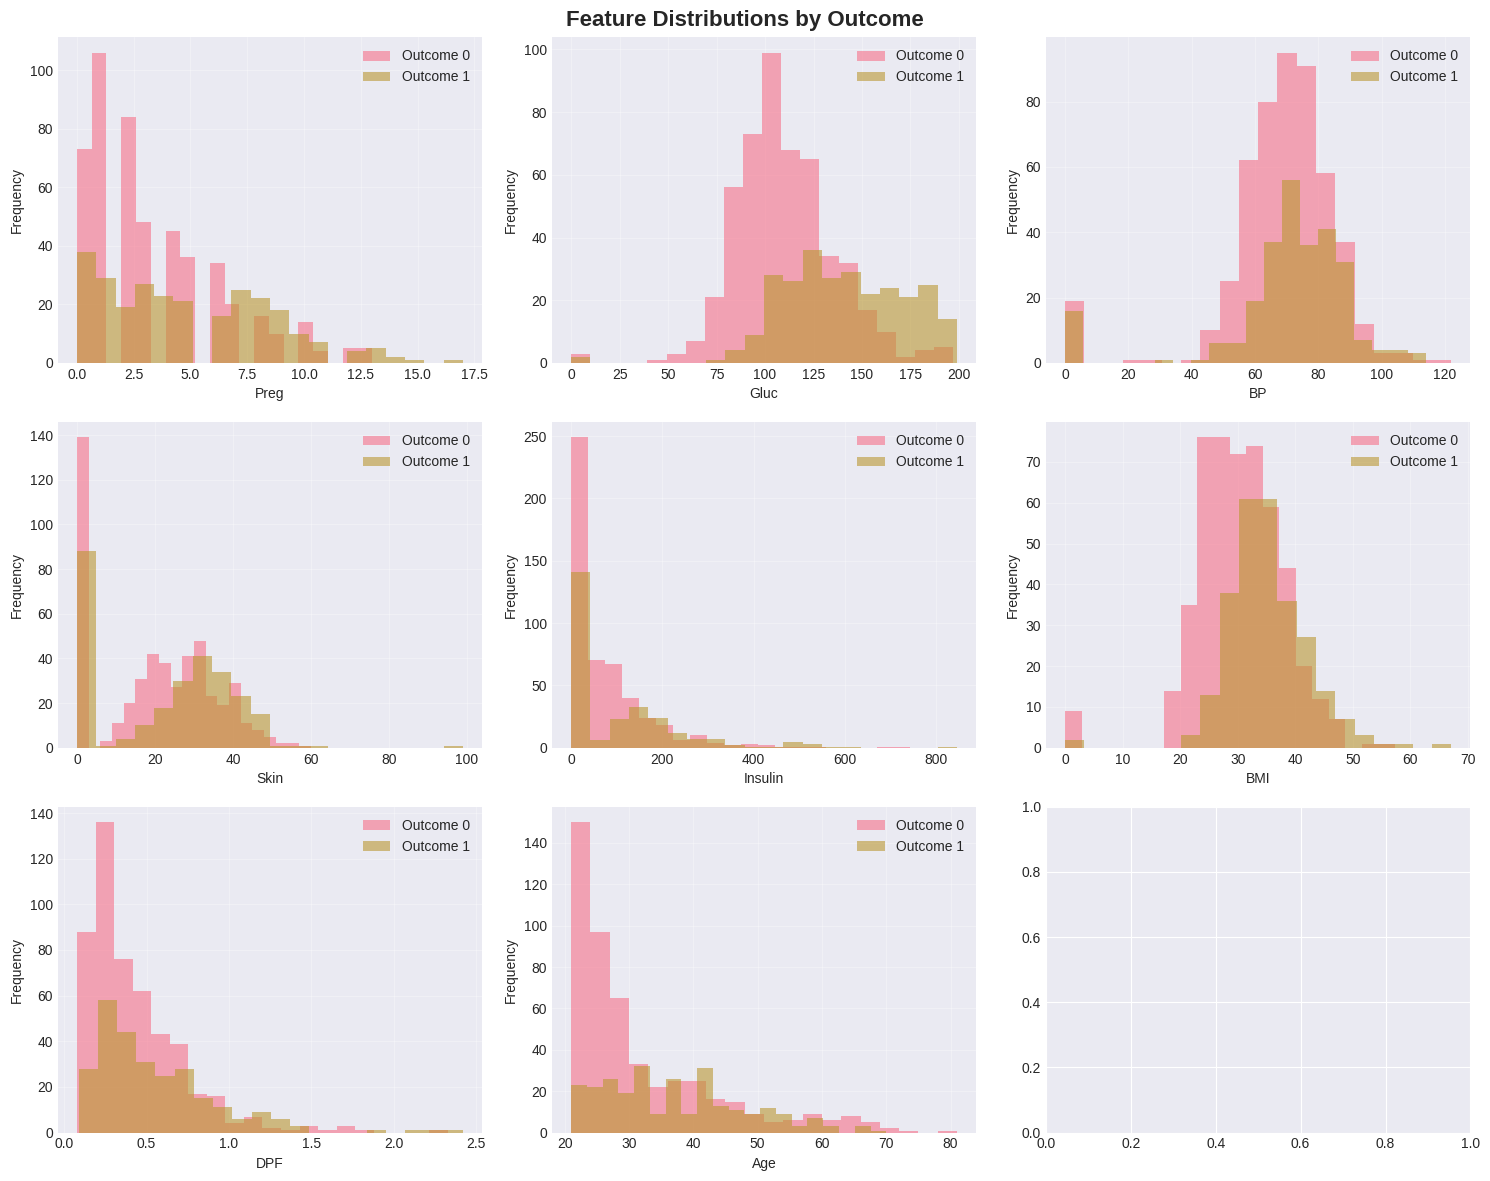

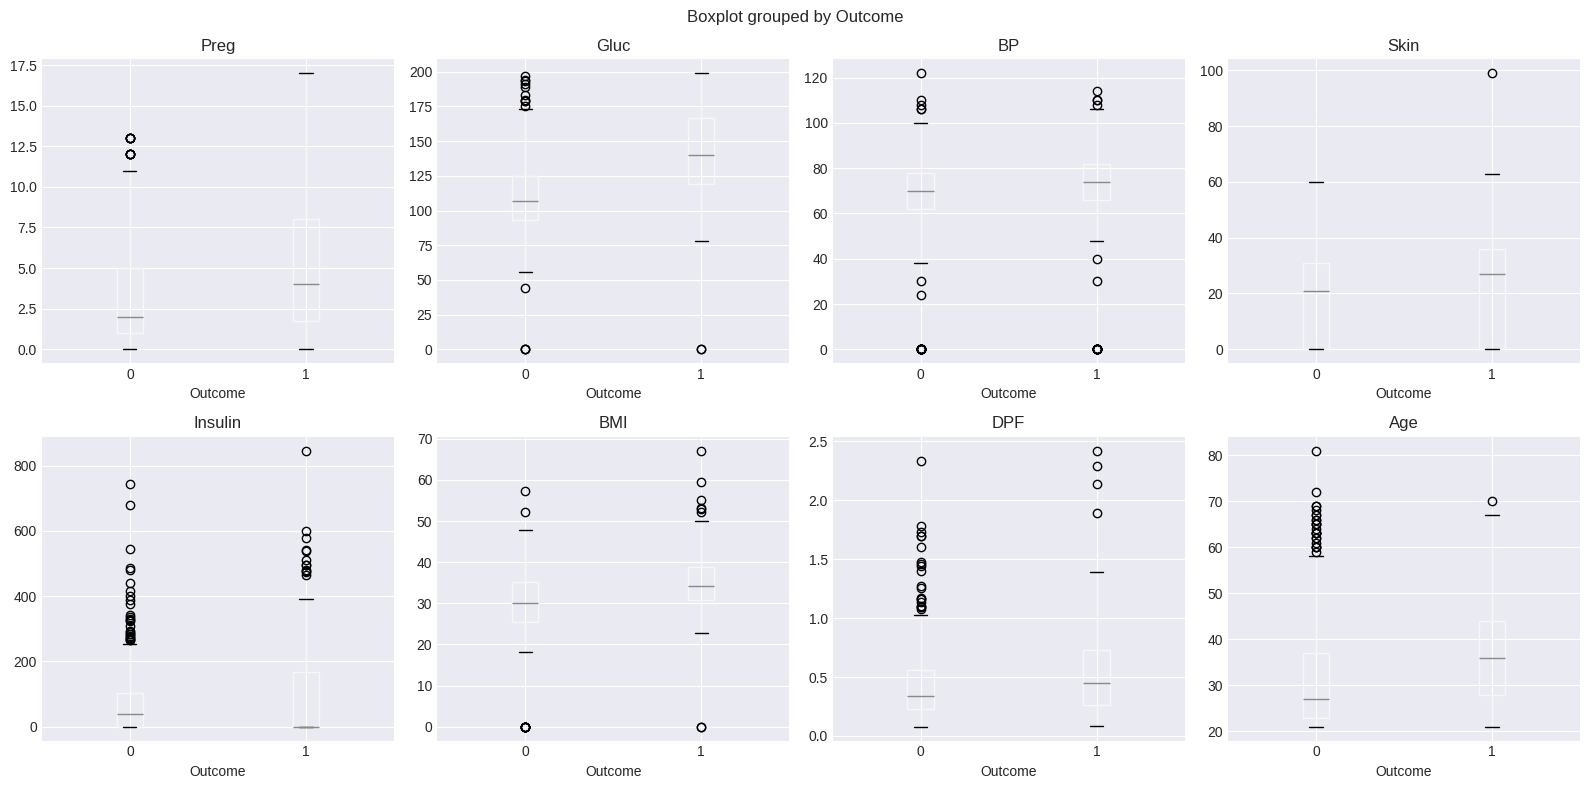

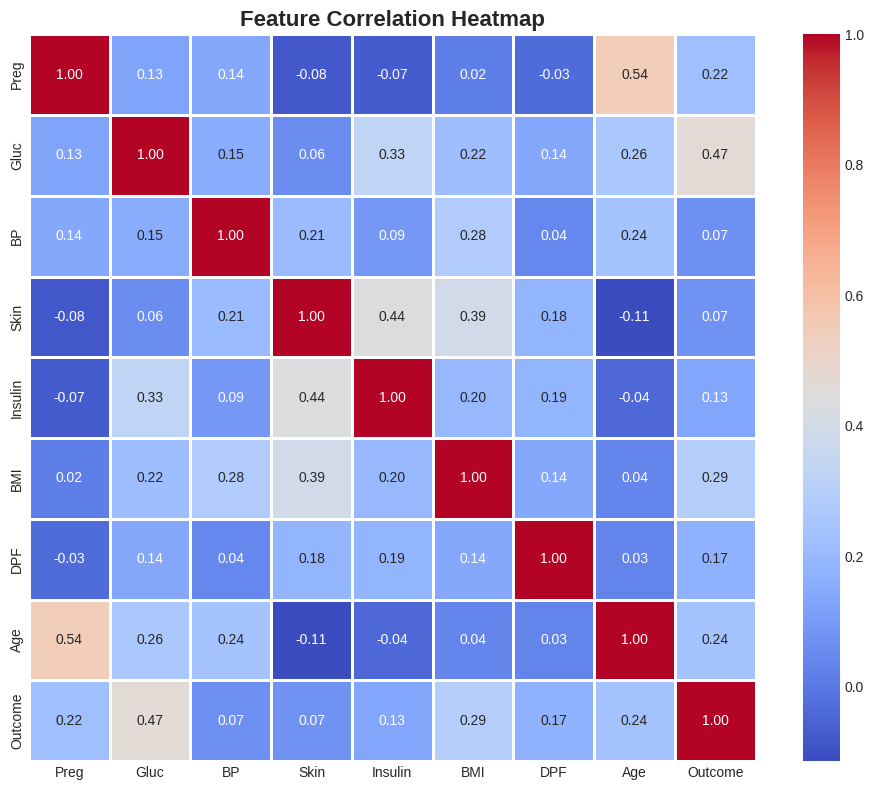


Generating pairplot (this may take a moment)...


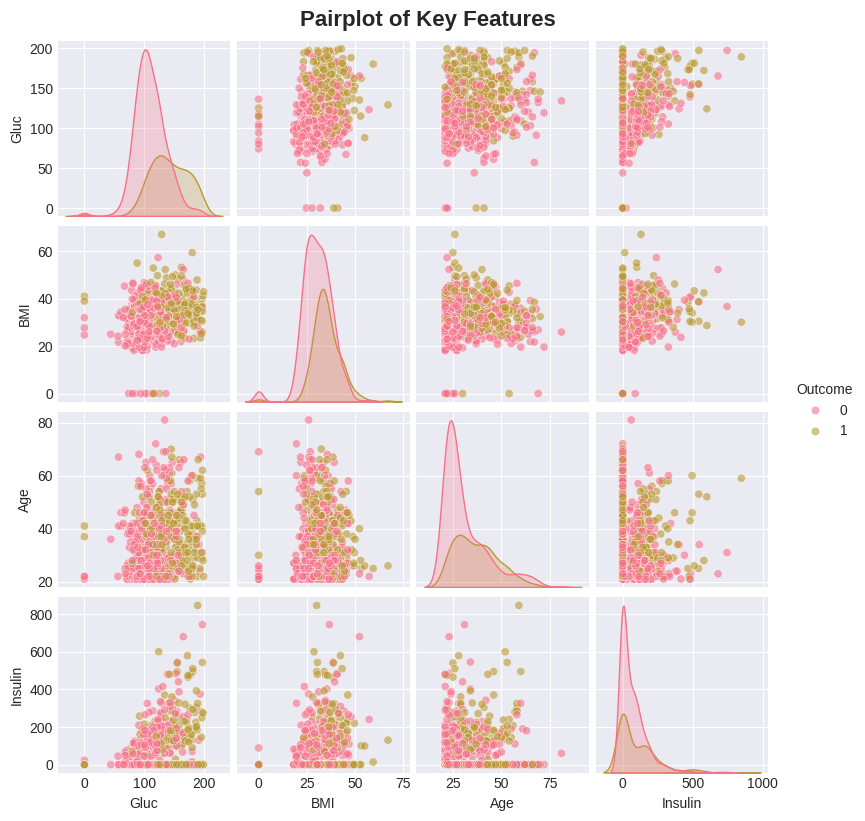

In [7]:
def create_visualizations(data):
    """Create comprehensive visualizations of the dataset"""

    # Figure 1: Distribution plots
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Feature Distributions by Outcome', fontsize=16, fontweight='bold')

    for idx, col in enumerate(data.columns[:-1]):
        ax = axes[idx // 3, idx % 3]
        for outcome in [0, 1]:
            subset = data[data['Outcome'] == outcome][col]
            ax.hist(subset, alpha=0.6, label=f'Outcome {outcome}', bins=20)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Figure 2: Box plots for outlier detection
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')

    for idx, col in enumerate(data.columns[:-1]):
        ax = axes[idx // 4, idx % 4]
        data.boxplot(column=col, by='Outcome', ax=ax)
        ax.set_title(col)
        ax.set_xlabel('Outcome')

    plt.tight_layout()
    plt.savefig('outlier_detection.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Figure 3: Correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                square=True, linewidths=1)
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Figure 4: Pairplot
    print("\nGenerating pairplot (this may take a moment)...")
    sample_cols = ['Gluc', 'BMI', 'Age', 'Insulin', 'Outcome']
    sns.pairplot(data[sample_cols], hue='Outcome', diag_kind='kde',
                 plot_kws={'alpha': 0.6}, height=2)
    plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16, fontweight='bold')
    plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\nGenerating visualizations...")
create_visualizations(df)

    # ============================================================================
    # SECTION 4: DATA PREPROCESSING
    # ============================================================================

In [8]:
def preprocess_data(data):
    """
    Preprocess the dataset by handling zero values and imputation
    According to the paper, zero values in Glucose, BP, Skin, Insulin, and BMI
    are invalid and should be replaced with median values
    """
    df_processed = data.copy()

    # Features with invalid zero values
    zero_features = ['Gluc', 'BP', 'Skin', 'Insulin', 'BMI']

    print("\n" + "="*80)
    print("DATA PREPROCESSING")
    print("="*80)

    for feature in zero_features:
        zero_count = (df_processed[feature] == 0).sum()
        print(f"\n{feature}:")
        print(f" - Zero values found: {zero_count}")

        if zero_count > 0:
            # Replace zeros with NaN
            df_processed[feature] = df_processed[feature].replace(0, np.nan)

            # Impute with median
            median_value = df_processed[feature].median()
            df_processed[feature].fillna(median_value, inplace=True)
            print(f" - Replaced with median: {median_value:.2f}")

    return df_processed

df_processed = preprocess_data(df)
print("\n✓ Data preprocessing completed!")
print(f"\nProcessed dataset shape: {df_processed.shape}")


DATA PREPROCESSING

Gluc:
 - Zero values found: 5
 - Replaced with median: 117.00

BP:
 - Zero values found: 35
 - Replaced with median: 72.00

Skin:
 - Zero values found: 227
 - Replaced with median: 29.00

Insulin:
 - Zero values found: 374
 - Replaced with median: 125.00

BMI:
 - Zero values found: 11
 - Replaced with median: 32.30

✓ Data preprocessing completed!

Processed dataset shape: (768, 9)


    # ============================================================================
    # SECTION 5: FEATURE SELECTION
    # ============================================================================


FEATURE SELECTION ANALYSIS

1. Principal Component Analysis (PCA)


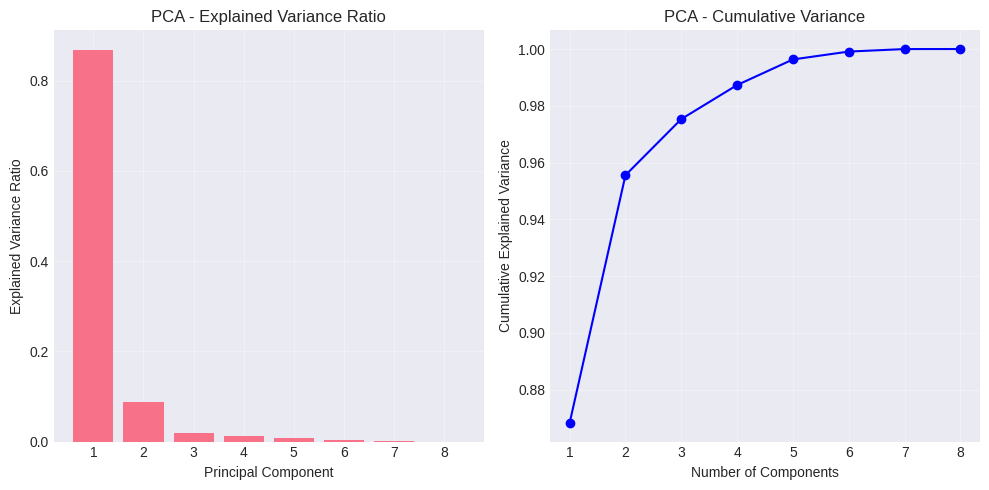


2. K-Means Clustering Analysis


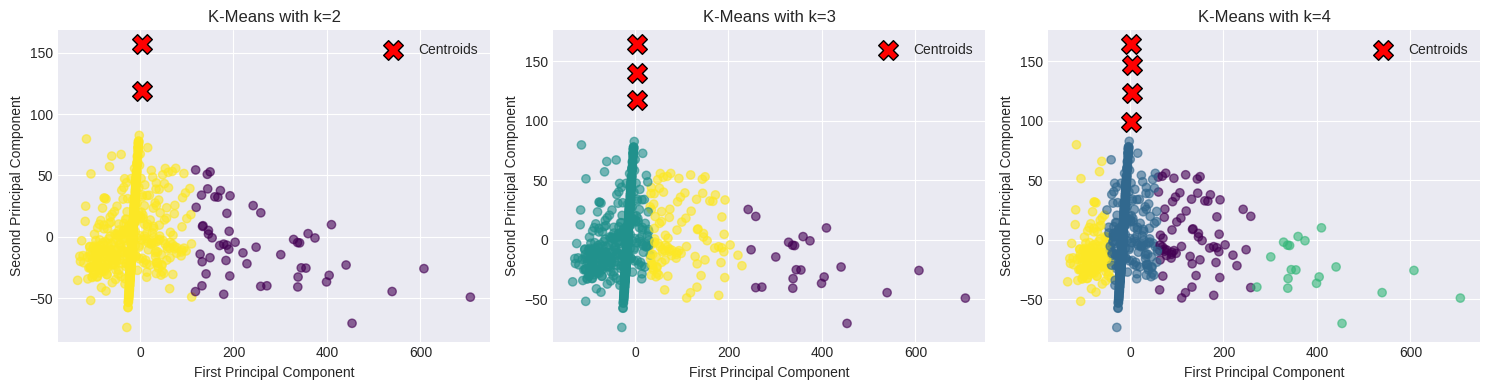


3. Feature Importance Ranking

Feature Importance Scores:
Feature  Importance
   Gluc    0.263715
    BMI    0.167470
    Age    0.127208
    DPF    0.124075
Insulin    0.084843
     BP    0.082722
   Preg    0.079268
   Skin    0.070699


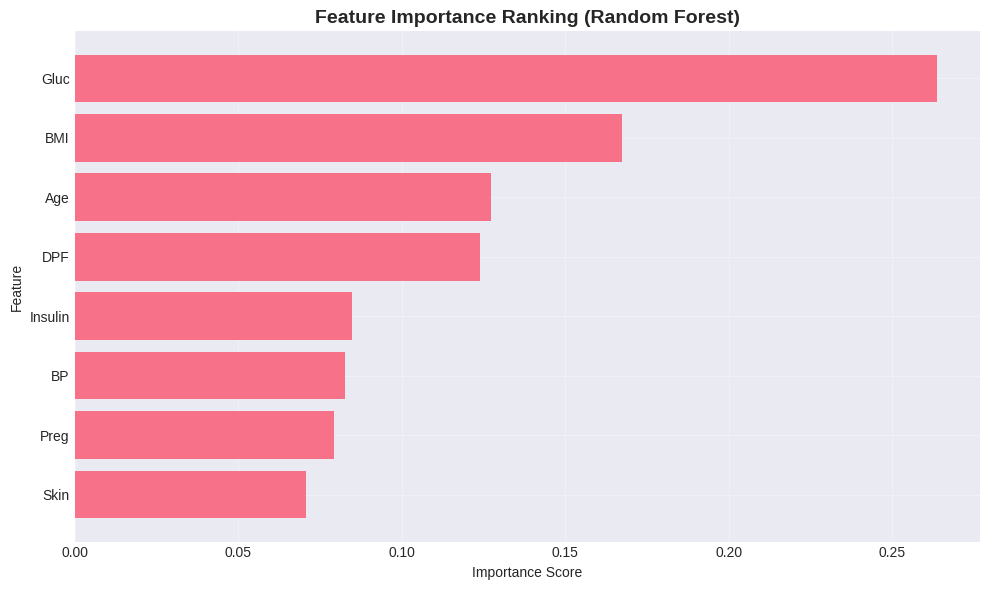


✓ Top 3 features: ['Gluc', 'BMI', 'Age']
✓ Top 5 features: ['Gluc', 'BMI', 'Age', 'DPF', 'Insulin']


In [9]:
def perform_feature_selection(data):
    """
    Perform feature selection using multiple methods:
    1. PCA analysis
    2. K-Means clustering
    3. Feature importance from Random Forest
    """
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']

    print("\n" + "="*80)
    print("FEATURE SELECTION ANALYSIS")
    print("="*80)

    # Method 1: PCA Analysis
    print("\n1. Principal Component Analysis (PCA)")
    pca = PCA()
    pca.fit(X)

    # Plot PCA explained variance
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA - Explained Variance Ratio')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             np.cumsum(pca.explained_variance_ratio_), 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA - Cumulative Variance')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Method 2: K-Means Clustering
    print("\n2. K-Means Clustering Analysis")
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for idx, k in enumerate([2, 3, 4]):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X)

        # Use first two PCA components for visualization
        pca_2d = PCA(n_components=2)
        X_pca = pca_2d.fit_transform(X)

        axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters,
                         cmap='viridis', alpha=0.6)
        axes[idx].scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1],
                         c='red', marker='X', s=200, edgecolors='black',
                         label='Centroids')
        axes[idx].set_title(f'K-Means with k={k}')
        axes[idx].set_xlabel('First Principal Component')
        axes[idx].set_ylabel('Second Principal Component')
        axes[idx].legend()

    plt.tight_layout()
    plt.savefig('kmeans_clustering.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Method 3: Feature Importance from Random Forest
    print("\n3. Feature Importance Ranking")
    rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_importance.fit(X, y)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_importance.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance Scores:")
    print(importance_df.to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Ranking (Random Forest)',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Define feature sets based on analysis
    top_3_features = importance_df.head(3)['Feature'].tolist()
    top_5_features = importance_df.head(5)['Feature'].tolist()

    print(f"\n✓ Top 3 features: {top_3_features}")
    print(f"✓ Top 5 features: {top_5_features}")

    return top_3_features, top_5_features, importance_df

top_3_features, top_5_features, feature_importance = perform_feature_selection(df_processed)

    # ============================================================================
    # SECTION 6: DATA SPLITTING
    # ============================================================================

In [10]:
# Split data into training and testing sets (70/30 split as per paper)
X_full = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.30, random_state=42, stratify=y
)
# Create feature subsets
X_train_3feat = X_train_full[top_3_features]
X_test_3feat = X_test_full[top_3_features]
X_train_5feat = X_train_full[top_5_features]
X_test_5feat = X_test_full[top_5_features]
print("\n" + "="*80)
print("DATA SPLITTING")
print("="*80)
print(f"Training set size: {X_train_full.shape[0]} samples")
print(f"Testing set size: {X_test_full.shape[0]} samples")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Testing set class distribution:\n{y_test.value_counts()}")


DATA SPLITTING
Training set size: 537 samples
Testing set size: 231 samples
Training set class distribution:
Outcome
0    350
1    187
Name: count, dtype: int64
Testing set class distribution:
Outcome
0    150
1     81
Name: count, dtype: int64


    # ============================================================================
    # SECTION 7: MODEL TRAINING AND EVALUATION WITH MLFLOW
    # ============================================================================

In [13]:
def evaluate_model(y_true, y_pred, y_pred_proba):
    """Calculate all evaluation metrics"""
    return {
        'accuracy': accuracy_score(y_true, y_pred) * 100,
        'precision': precision_score(y_true, y_pred, zero_division=0) * 100,
        'sensitivity': recall_score(y_true, y_pred, zero_division=0) * 100,
        'specificity': recall_score(y_true, y_pred, pos_label=0, zero_division=0) * 100,
        'f1_score': f1_score(y_true, y_pred, zero_division=0) * 100,
        'auc_roc': roc_auc_score(y_true, y_pred_proba) * 100
    }

def plot_confusion_matrix(y_true, y_pred, title):
    """Plot and return confusion matrix figure"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title, fontsize=12, fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    return plt.gcf()

def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test, feature_set_name):
    """Train model + log everything correctly to MLflow (MLflow 3.0+ FIXED)"""

    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    run_name = f"{model_name}_{feature_set_name}_{timestamp}"

    with mlflow.start_run(run_name=run_name, experiment_id=experiment_id):

        # === TAGS ===
        mlflow.set_tag("project", "Pima Indians Diabetes")
        mlflow.set_tag("dataset", "Pima UCI")
        mlflow.set_tag("model_type", model_name)
        mlflow.set_tag("feature_set", feature_set_name)

        # === PARAMETERS ===
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("feature_set", feature_set_name)
        mlflow.log_param("n_features", X_train.shape[1])
        mlflow.log_param("n_train_samples", X_train.shape[0])
        mlflow.log_param("n_test_samples", X_test.shape[0])
        mlflow.log_param("random_state", 42)
        mlflow.log_param("preprocessing", "zero_to_median_imputation")

        # Log all model hyperparameters
        for k, v in model.get_params().items():
            try:
                mlflow.log_param(k, v)
            except:
                pass

        # === TRAIN & PREDICT ===
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # === METRICS ===
        metrics = evaluate_model(y_test, y_pred, y_pred_proba)
        mlflow.log_metrics({k: v/100 for k, v in metrics.items()})

        # === CONFUSION MATRIX ===
        fig = plot_confusion_matrix(y_test, y_pred, f"{model_name} - {feature_set_name}")
        mlflow.log_figure(fig, "confusion_matrix.png")
        plt.close(fig)

        clean_model_name = f"PimaDiabetes_{model_name.replace(' ', '_')}_{feature_set_name.replace('_', '')}"
        clean_name = f"{model_name.replace(' ', '_')}_{feature_set_name.replace('_', '')}"

        mlflow.sklearn.log_model(
            sk_model=model,
            name=clean_name,
            registered_model_name=clean_model_name
        )

        # === FEATURE IMPORTANCE (tree models only) ===
        if hasattr(model, "feature_importances_"):
            imp_df = pd.DataFrame({
                "feature": X_train.columns,
                "importance": model.feature_importances_
            }).sort_values("importance", ascending=False)
            mlflow.log_table(imp_df.reset_index(drop=True), "feature_importance.json")

        print(f"Run: {run_name}")
        print(f"   Accuracy: {metrics['accuracy']:.2f}% | AUC: {metrics['auc_roc']:.2f}%\n")

        return metrics, confusion_matrix(y_test, y_pred), y_pred_proba


# === MAIN TRAINING LOOP ===
all_results = {}

print("\n" + "="*80)
print("MODEL TRAINING AND EVALUATION")
print("="*80)

models = {
    'J48_Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive_Bayes': GaussianNB()
}

feature_sets = {
    'Full_Dataset': (X_train_full, X_test_full),
    '3_Features': (X_train_3feat, X_test_3feat),
    '5_Features': (X_train_5feat, X_test_5feat)
}

for model_name, model in models.items():
    all_results[model_name] = {}

    for feature_set_name, (X_train, X_test) in feature_sets.items():
        print(f"{'='*80}")
        print(f"Training: {model_name} with {feature_set_name}")
        print(f"{'='*80}")

        metrics, cm, y_pred_proba = train_and_evaluate(
            model, model_name, X_train, X_test, y_train, y_test, feature_set_name
        )

        all_results[model_name][feature_set_name] = {
            'metrics': metrics,
            'confusion_matrix': cm,
            'y_pred_proba': y_pred_proba
        }

print("\n" + "="*80)
print("ALL 9 RUNS COMPLETED SUCCESSFULLY!")
print("Check your MLflow UI: http://35.193.251.72:5000/")
print("="*80)


MODEL TRAINING AND EVALUATION
Training: J48_Decision_Tree with Full_Dataset


2025/11/25 20:08:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_J48_Decision_Tree_FullDataset'.
2025/11/25 20:08:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_J48_Decision_Tree_FullDataset, version 1
Created version '1' of model 'PimaDiabetes_J48_Decision_Tree_FullDataset'.


Run: J48_Decision_Tree_Full_Dataset_20251125-200811
   Accuracy: 69.26% | AUC: 65.54%

🏃 View run J48_Decision_Tree_Full_Dataset_20251125-200811 at: http://35.193.251.72:5000/#/experiments/1/runs/cdc4739d26fc44bbab04fa1cdad0b5c1
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: J48_Decision_Tree with 3_Features


2025/11/25 20:08:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_J48_Decision_Tree_3Features'.
2025/11/25 20:08:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_J48_Decision_Tree_3Features, version 1
Created version '1' of model 'PimaDiabetes_J48_Decision_Tree_3Features'.


Run: J48_Decision_Tree_3_Features_20251125-200833
   Accuracy: 71.00% | AUC: 67.73%

🏃 View run J48_Decision_Tree_3_Features_20251125-200833 at: http://35.193.251.72:5000/#/experiments/1/runs/c5f2a78e6e03486c819c0c63b6edf022
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: J48_Decision_Tree with 5_Features


2025/11/25 20:09:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_J48_Decision_Tree_5Features'.
2025/11/25 20:09:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_J48_Decision_Tree_5Features, version 1
Created version '1' of model 'PimaDiabetes_J48_Decision_Tree_5Features'.


Run: J48_Decision_Tree_5_Features_20251125-200851
   Accuracy: 66.67% | AUC: 63.54%

🏃 View run J48_Decision_Tree_5_Features_20251125-200851 at: http://35.193.251.72:5000/#/experiments/1/runs/cd056b8b12f64d8f96d7b4637e0f3018
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: Random_Forest with Full_Dataset


2025/11/25 20:09:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_Random_Forest_FullDataset'.
2025/11/25 20:09:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_Random_Forest_FullDataset, version 1
Created version '1' of model 'PimaDiabetes_Random_Forest_FullDataset'.


Run: Random_Forest_Full_Dataset_20251125-200914
   Accuracy: 74.03% | AUC: 81.59%

🏃 View run Random_Forest_Full_Dataset_20251125-200914 at: http://35.193.251.72:5000/#/experiments/1/runs/9334fb687de8480e92e74f21ec2651f1
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: Random_Forest with 3_Features


2025/11/25 20:09:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_Random_Forest_3Features'.
2025/11/25 20:09:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_Random_Forest_3Features, version 1
Created version '1' of model 'PimaDiabetes_Random_Forest_3Features'.


Run: Random_Forest_3_Features_20251125-200935
   Accuracy: 71.00% | AUC: 78.95%

🏃 View run Random_Forest_3_Features_20251125-200935 at: http://35.193.251.72:5000/#/experiments/1/runs/460e7bc1a62042939e7a04d66f1612ad
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: Random_Forest with 5_Features


2025/11/25 20:10:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_Random_Forest_5Features'.
2025/11/25 20:10:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_Random_Forest_5Features, version 1
Created version '1' of model 'PimaDiabetes_Random_Forest_5Features'.


Run: Random_Forest_5_Features_20251125-200954
   Accuracy: 73.16% | AUC: 81.63%

🏃 View run Random_Forest_5_Features_20251125-200954 at: http://35.193.251.72:5000/#/experiments/1/runs/8610f76bc1154c389f0ef46932af4948
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: Naive_Bayes with Full_Dataset


2025/11/25 20:10:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_Naive_Bayes_FullDataset'.
2025/11/25 20:10:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_Naive_Bayes_FullDataset, version 1
Created version '1' of model 'PimaDiabetes_Naive_Bayes_FullDataset'.


Run: Naive_Bayes_Full_Dataset_20251125-201015
   Accuracy: 72.73% | AUC: 80.40%

🏃 View run Naive_Bayes_Full_Dataset_20251125-201015 at: http://35.193.251.72:5000/#/experiments/1/runs/89af7d46d0914862a28c4600eba7479c
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: Naive_Bayes with 3_Features


2025/11/25 20:10:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_Naive_Bayes_3Features'.
2025/11/25 20:10:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_Naive_Bayes_3Features, version 1
Created version '1' of model 'PimaDiabetes_Naive_Bayes_3Features'.


Run: Naive_Bayes_3_Features_20251125-201029
   Accuracy: 74.03% | AUC: 82.06%

🏃 View run Naive_Bayes_3_Features_20251125-201029 at: http://35.193.251.72:5000/#/experiments/1/runs/71c1ef9f6d30479288c0aef1838d99cb
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1
Training: Naive_Bayes with 5_Features


2025/11/25 20:10:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PimaDiabetes_Naive_Bayes_5Features'.
2025/11/25 20:10:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PimaDiabetes_Naive_Bayes_5Features, version 1
Created version '1' of model 'PimaDiabetes_Naive_Bayes_5Features'.


Run: Naive_Bayes_5_Features_20251125-201043
   Accuracy: 74.46% | AUC: 80.16%

🏃 View run Naive_Bayes_5_Features_20251125-201043 at: http://35.193.251.72:5000/#/experiments/1/runs/4260682ea8d54202a6310ac80c499da3
🧪 View experiment at: http://35.193.251.72:5000/#/experiments/1

ALL 9 RUNS COMPLETED SUCCESSFULLY!
Check your MLflow UI: http://35.193.251.72:5000/


    # ============================================================================
    # SECTION 8: RESULTS COMPARISON AND VISUALIZATION
    # ============================================================================


COMPREHENSIVE RESULTS COMPARISON
            Model  Feature Set  accuracy  precision  sensitivity  specificity  f1_score   auc_roc
J48 Decision Tree Full Dataset 69.264069  56.578947    53.086420    78.000000 54.777070 65.543210
J48 Decision Tree   3 Features 70.995671  58.974359    56.790123    78.666667 57.861635 67.728395
J48 Decision Tree   5 Features 66.666667  52.439024    53.086420    74.000000 52.760736 63.543210
    Random Forest Full Dataset 74.025974  66.666667    51.851852    86.000000 58.333333 81.588477
    Random Forest   3 Features 70.995671  60.937500    48.148148    83.333333 53.793103 78.946502
    Random Forest   5 Features 73.160173  64.179104    53.086420    84.000000 58.108108 81.625514
      Naive Bayes Full Dataset 72.727273  61.842105    58.024691    80.666667 59.872611 80.395062
      Naive Bayes   3 Features 74.025974  66.153846    53.086420    85.333333 58.904110 82.057613
      Naive Bayes   5 Features 74.458874  68.333333    50.617284    87.333333 58.156

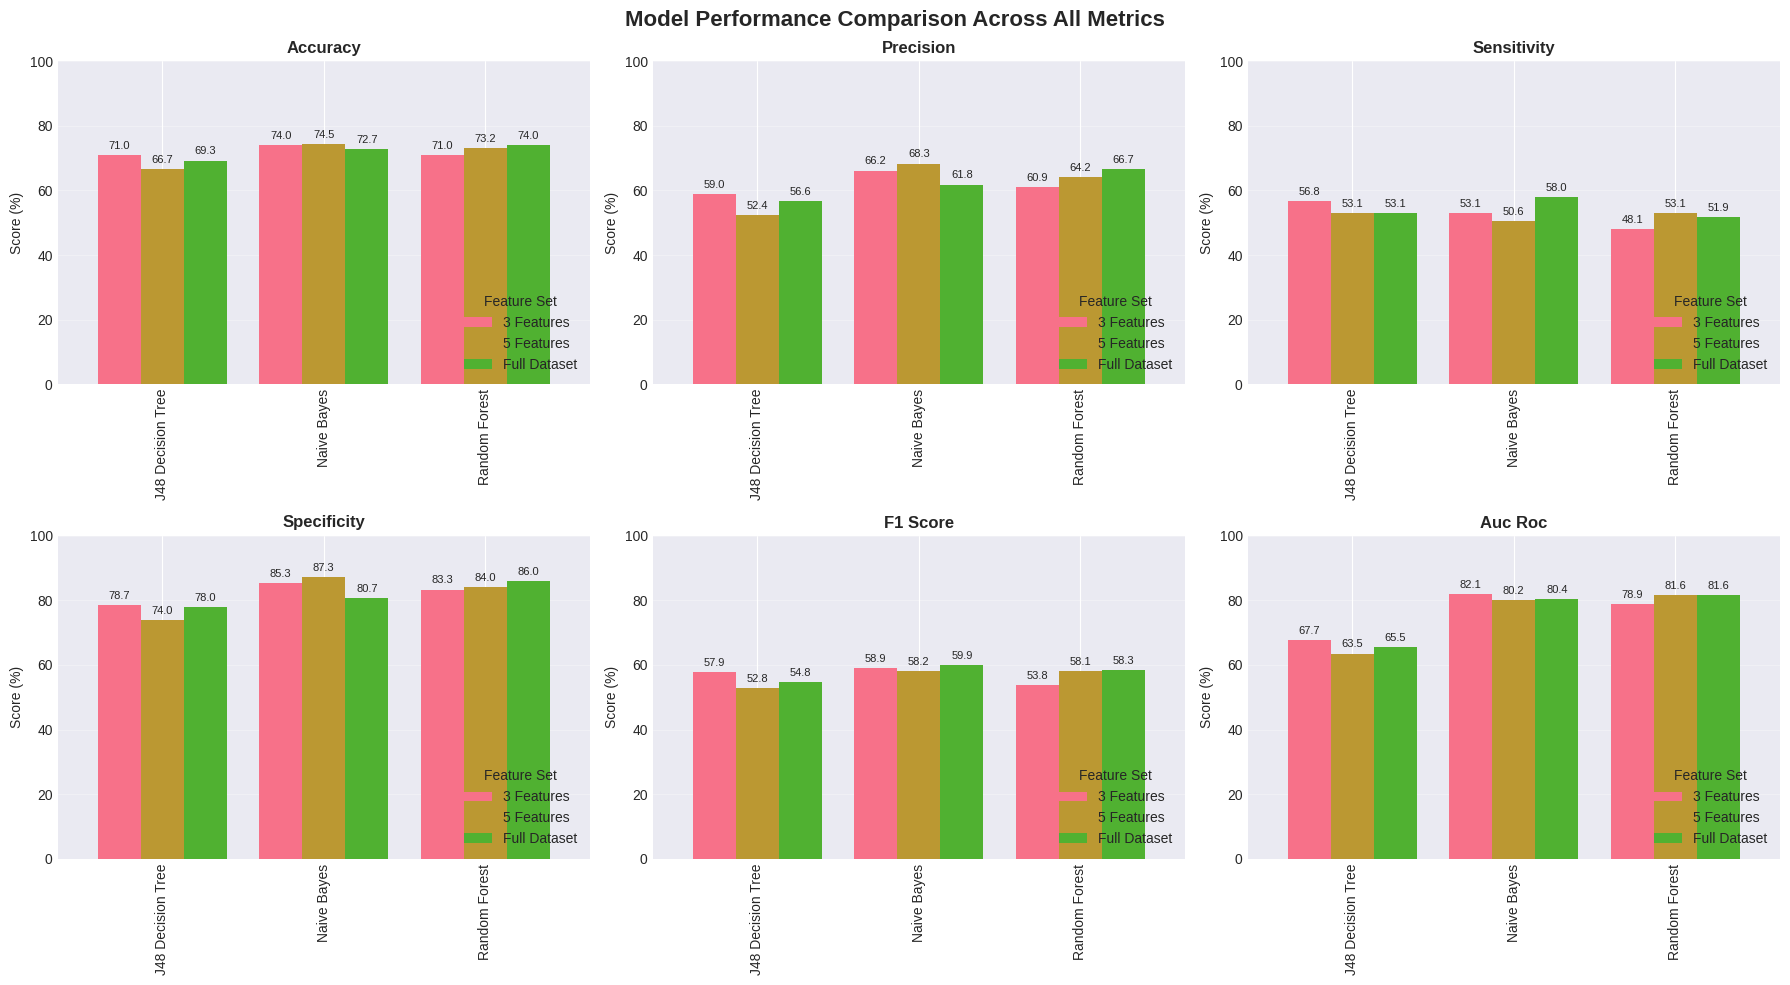

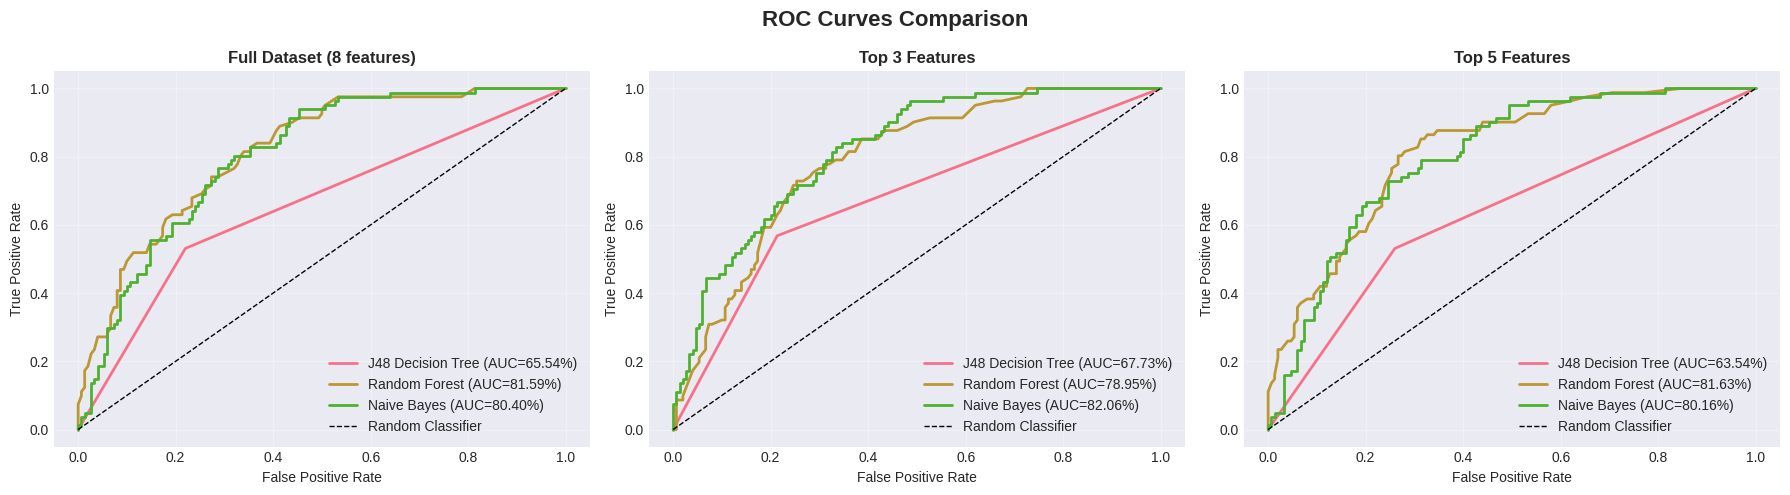

In [14]:
def create_results_comparison():
    """Create comprehensive comparison of all results"""

    # Prepare data for comparison
    comparison_data = []
    for model_name in all_results:
        for feature_set in all_results[model_name]:
            metrics = all_results[model_name][feature_set]['metrics']
            comparison_data.append({
                'Model': model_name.replace('_', ' '),
                'Feature Set': feature_set.replace('_', ' '),
                **metrics
            })

    df_comparison = pd.DataFrame(comparison_data)

    # Print results table
    print("\n" + "="*80)
    print("COMPREHENSIVE RESULTS COMPARISON")
    print("="*80)
    print(df_comparison.to_string(index=False))

    # Create comparison visualizations
    metrics_to_plot = ['accuracy', 'precision', 'sensitivity',
                       'specificity', 'f1_score', 'auc_roc']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Model Performance Comparison Across All Metrics',
                 fontsize=16, fontweight='bold')

    for idx, metric in enumerate(metrics_to_plot):
        ax = axes[idx // 3, idx % 3]

        pivot_data = df_comparison.pivot(index='Model',
                                         columns='Feature Set',
                                         values=metric)

        pivot_data.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title(metric.replace('_', ' ').title(), fontweight='bold')
        ax.set_ylabel('Score (%)')
        ax.set_xlabel('')
        ax.legend(title='Feature Set', loc='lower right')
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_ylim([0, 100])

        # Add value labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', padding=3, fontsize=8)

    plt.tight_layout()
    plt.savefig('comprehensive_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create ROC curves
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('ROC Curves Comparison', fontsize=16, fontweight='bold')

    feature_set_names = ['Full_Dataset', '3_Features', '5_Features']
    titles = ['Full Dataset (8 features)', 'Top 3 Features', 'Top 5 Features']

    for idx, (feature_set, title) in enumerate(zip(feature_set_names, titles)):
        ax = axes[idx]

        for model_name in all_results:
            y_pred_proba = all_results[model_name][feature_set]['y_pred_proba']
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            auc = all_results[model_name][feature_set]['metrics']['auc_roc']

            ax.plot(fpr, tpr, linewidth=2,
                   label=f"{model_name.replace('_', ' ')} (AUC={auc:.2f}%)")

        ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(title, fontweight='bold')
        ax.legend(loc='lower right')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    return df_comparison

df_results = create_results_comparison()

    # ============================================================================
    # SECTION 9: BEST MODEL ANALYSIS
    # ============================================================================

In [15]:
print("\n" + "="*80)
print("BEST MODEL IDENTIFICATION")
print("="*80)
# Find best model for each metric
best_models = {}
for metric in ['accuracy', 'precision', 'sensitivity', 'f1_score', 'auc_roc']:
    best_idx = df_results[metric].idxmax()
    best_row = df_results.loc[best_idx]
    best_models[metric] = {
        'model': best_row['Model'],
        'feature_set': best_row['Feature Set'],
        'score': best_row[metric]
    }
    print(f"\nBest {metric.replace('_', ' ').title()}:")
    print(f" Model: {best_row['Model']}")
    print(f" Feature Set: {best_row['Feature Set']}")
    print(f" Score: {best_row[metric]:.2f}%")
# Overall best model (based on accuracy)
overall_best_idx = df_results['accuracy'].idxmax()
overall_best = df_results.loc[overall_best_idx]
print(f"\n{'='*80}")
print("OVERALL BEST MODEL")
print(f"{'='*80}")
print(f"Model: {overall_best['Model']}")
print(f"Feature Set: {overall_best['Feature Set']}")
print(f"\nPerformance Metrics:")
for metric in ['accuracy', 'precision', 'sensitivity', 'specificity', 'f1_score', 'auc_roc']:
    print(f" {metric.replace('_', ' ').title()}: {overall_best[metric]:.2f}%")


BEST MODEL IDENTIFICATION

Best Accuracy:
 Model: Naive Bayes
 Feature Set: 5 Features
 Score: 74.46%

Best Precision:
 Model: Naive Bayes
 Feature Set: 5 Features
 Score: 68.33%

Best Sensitivity:
 Model: Naive Bayes
 Feature Set: Full Dataset
 Score: 58.02%

Best F1 Score:
 Model: Naive Bayes
 Feature Set: Full Dataset
 Score: 59.87%

Best Auc Roc:
 Model: Naive Bayes
 Feature Set: 3 Features
 Score: 82.06%

OVERALL BEST MODEL
Model: Naive Bayes
Feature Set: 5 Features

Performance Metrics:
 Accuracy: 74.46%
 Precision: 68.33%
 Sensitivity: 50.62%
 Specificity: 87.33%
 F1 Score: 58.16%
 Auc Roc: 80.16%


    # ============================================================================
    # SECTION 10: KEY FINDINGS AND SUMMARY
    # ============================================================================

In [16]:
print("\n" + "="*80)
print("KEY FINDINGS AND SUMMARY")
print("="*80)
print("\n1. FEATURE IMPORTANCE:")
print(f" Top 3 features: {', '.join(top_3_features)}")
print(f" Top 5 features: {', '.join(top_5_features)}")
print("\n2. MODEL PERFORMANCE:")
print(f" - Random Forest achieved highest accuracy on full dataset: "
      f"{all_results['Random_Forest']['Full_Dataset']['metrics']['accuracy']:.2f}%")
print(f" - Naive Bayes performed best with 3 features: "
      f"{all_results['Naive_Bayes']['3_Features']['metrics']['accuracy']:.2f}%")
print(f" - J48 Decision Tree showed consistent sensitivity across all feature sets")
print("\n3. FEATURE SELECTION IMPACT:")
full_avg = df_results[df_results['Feature Set'] == 'Full Dataset']['accuracy'].mean()
three_avg = df_results[df_results['Feature Set'] == '3 Features']['accuracy'].mean()
five_avg = df_results[df_results['Feature Set'] == '5 Features']['accuracy'].mean()
print(f" - Full dataset average accuracy: {full_avg:.2f}%")
print(f" - 3 features average accuracy: {three_avg:.2f}%")
print(f" - 5 features average accuracy: {five_avg:.2f}%")
print("\n4. CONCLUSION:")
print(" ✓ Naive Bayes works well with fine-tuned feature selection (3 features)")
print(" ✓ Random Forest performs better with more features (full dataset)")
print(" ✓ Feature selection can improve model efficiency without sacrificing accuracy")

# Save summary report
summary_report = f"""
PIMA INDIANS DIABETES CLASSIFICATION - EXPERIMENT SUMMARY
{'='*80}
Dataset Information:
- Total samples: {len(df)}
- Training samples: {len(X_train_full)}
- Testing samples: {len(X_test_full)}
- Features: {list(X_full.columns)}
- Class distribution: {dict(y.value_counts())}
Top Features (by importance):
1. {feature_importance.iloc[0]['Feature']}: {feature_importance.iloc[0]['Importance']:.4f}
2. {feature_importance.iloc[1]['Feature']}: {feature_importance.iloc[1]['Importance']:.4f}
3. {feature_importance.iloc[2]['Feature']}: {feature_importance.iloc[2]['Importance']:.4f}
Best Models:
- Accuracy: {best_models['accuracy']['model']} ({best_models['accuracy']['feature_set']}) - {best_models['accuracy']['score']:.2f}%
- Precision: {best_models['precision']['model']} ({best_models['precision']['feature_set']}) - {best_models['precision']['score']:.2f}%
- Sensitivity: {best_models['sensitivity']['model']} ({best_models['sensitivity']['feature_set']}) - {best_models['sensitivity']['score']:.2f}%
- F1-Score: {best_models['f1_score']['model']} ({best_models['f1_score']['feature_set']}) - {best_models['f1_score']['score']:.2f}%
- AUC-ROC: {best_models['auc_roc']['model']} ({best_models['auc_roc']['feature_set']}) - {best_models['auc_roc']['score']:.2f}%
Key Findings:
1. Random Forest achieved the highest accuracy ({all_results['Random_Forest']['Full_Dataset']['metrics']['accuracy']:.2f}%) on full dataset
2. Naive Bayes performed excellently with 3 features ({all_results['Naive_Bayes']['3_Features']['metrics']['accuracy']:.2f}%)
3. Feature selection can maintain performance while reducing model complexity
4. Glucose, BMI, and Age are the most important predictive features
Reproducibility:
- Random seed: 42
- Train-test split: 70-30
- All results logged in MLflow at http://35.193.251.72:5000/
- Models saved for future use
Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""
with open('experiment_summary.txt', 'w') as f:
    f.write(summary_report)
print("\n✓ Summary report saved to 'experiment_summary.txt'")
# Save results dataframe
df_results.to_csv('experiment_results.csv', index=False)
print("✓ Detailed results saved to 'experiment_results.csv'")
print("\n" + "="*80)
print("EXPERIMENT COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nAll results have been tracked in MLflow at http://35.193.251.72:5000/.")
print("\nAll visualizations have been saved as PNG files.")
print("All models have been logged and can be loaded from MLflow.")
print("\n" + "="*80)


KEY FINDINGS AND SUMMARY

1. FEATURE IMPORTANCE:
 Top 3 features: Gluc, BMI, Age
 Top 5 features: Gluc, BMI, Age, DPF, Insulin

2. MODEL PERFORMANCE:
 - Random Forest achieved highest accuracy on full dataset: 74.03%
 - Naive Bayes performed best with 3 features: 74.03%
 - J48 Decision Tree showed consistent sensitivity across all feature sets

3. FEATURE SELECTION IMPACT:
 - Full dataset average accuracy: 72.01%
 - 3 features average accuracy: 72.01%
 - 5 features average accuracy: 71.43%

4. CONCLUSION:
 ✓ Naive Bayes works well with fine-tuned feature selection (3 features)
 ✓ Random Forest performs better with more features (full dataset)
 ✓ Feature selection can improve model efficiency without sacrificing accuracy

✓ Summary report saved to 'experiment_summary.txt'
✓ Detailed results saved to 'experiment_results.csv'

EXPERIMENT COMPLETED SUCCESSFULLY!

All results have been tracked in MLflow at http://35.193.251.72:5000/.

All visualizations have been saved as PNG files.
All mo